## Regression

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from matplotlib import rcParams

/Users/ujjawalpathak/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# load Boston housing data
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [5]:
boston.data.shape

(506, 13)

In [6]:
# print column names
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# print description
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# add column names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
print boston.target.shape

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatter Plots

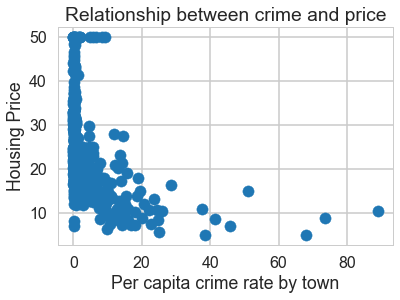

In [15]:
plt.scatter(bos.CRIM,bos.PRICE)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Housing Price")
plt.title("Relationship between crime and price");

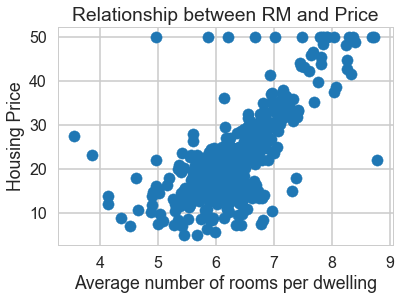

In [17]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price");

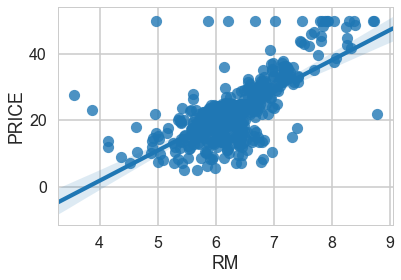

In [19]:
sns.regplot(y='PRICE', x='RM', data=bos, fit_reg=True);

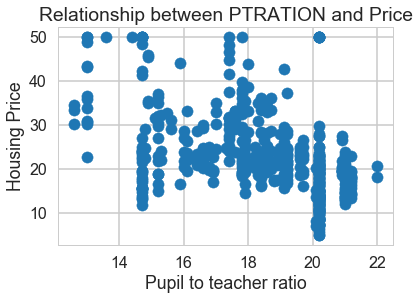

In [20]:
plt.scatter(bos.PTRATIO,bos.PRICE)
plt.xlabel("Pupil to teacher ratio")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATION and Price");

### Histogram

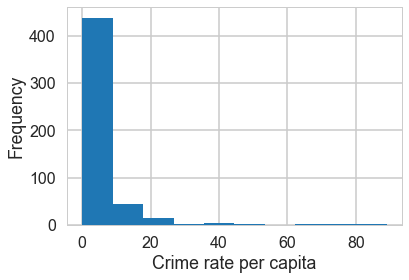

In [21]:
plt.hist(bos.CRIM)
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show();

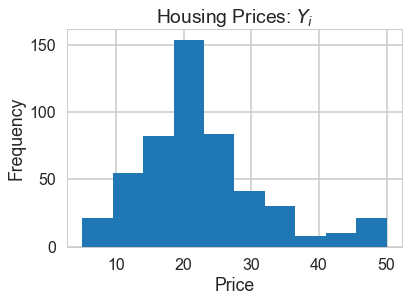

In [23]:
plt.hist(bos.PRICE)
plt.title("Housing Prices: $Y_i$")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show();

## Linear Regression

In [24]:
from statsmodels.formula.api import ols

In [26]:
m = ols('PRICE ~ RM',bos).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           2.49e-74
Time:                        10:32:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

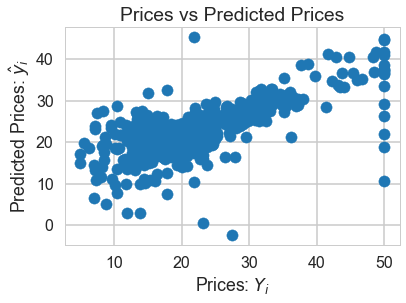

In [27]:
plt.scatter(bos['PRICE'],m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted Prices");

In [28]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis=1)

In [29]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print "Estimated intercept coefficient:", lm.intercept_

Estimated intercept coefficient: 36.491103280363404


In [36]:
print "Number of coefficient:",len(lm.coef_)

Number of coefficient: 13


In [38]:
pd.DataFrame(zip(X.columns,lm.coef_), columns=['features', "estimatedCoefficient"])

,features,estimatedCoefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [39]:
# predict prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

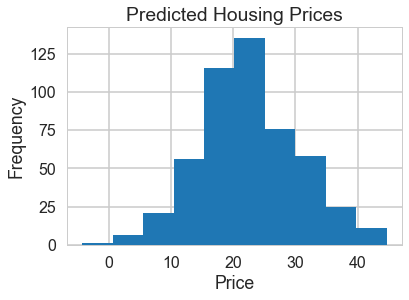

In [40]:
plt.hist(lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Predicted Housing Prices");

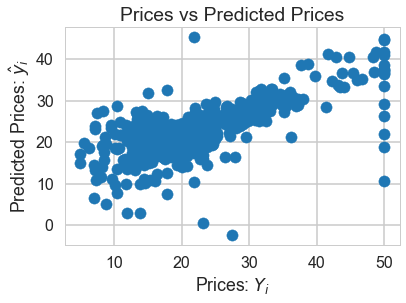

In [41]:
plt.scatter(bos['PRICE'],m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted Prices");

In [42]:
print np.sum((bos.PRICE - lm.predict(X)) ** 2)

11080.276284149873


In [43]:
# mean squared error
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print mseFull

21.8977792177


In [44]:
# Relationship between PTRATIO and Price
lm = LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print msePTRATIO

62.6522000138


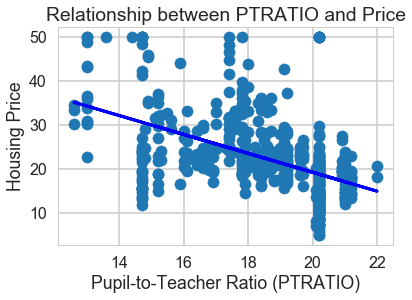

In [46]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show();

## Train and Test Set

In [48]:
X_train = X[:-50]
X_test = X[-50:]
y_train = bos.PRICE[:-50]
y_test = bos.PRICE[-50:]
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(456, 13)
(50, 13)
(456,)
(50,)


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, bos.PRICE, test_size=0.33, random_state=5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(339, 13)
(167, 13)
(339,)
(167,)


In [52]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

NameError: name 'Y_train' is not defined